# 1-Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, log_loss, cohen_kappa_score,
                             roc_auc_score, roc_curve, precision_recall_curve)

import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


#  2-Pré-processamento dos dados

In [ ]:
caminho = r"C:\Users\Danmc\OneDrive\Carreira_DataScience\Comunidade DS\_Repos\00_PosGraduacao\03_MachineLearning\PA_ML"
arquivo = "WA_Fn-UseC_-Telco-Customer-Churn.csv" 
df = pd.read_csv(f"{caminho}\\{arquivo}")

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# Verificar valores faltantes
print(df.isnull().sum())

# Corrigir tipo e preencher valores nulos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Remover colunas irrelevantes
df.drop(['customerID'], axis=1, inplace=True)

# Codificação de variáveis
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) == 2:
        df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, drop_first=True)

# Separar variáveis independentes e alvo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\Danmc\AppData\Local\Temp\ipykernel_2564\1277112079.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# 3-Treinamento de múltiplos modelos

In [5]:
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}

resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    resultados.append({
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'LogLoss': log_loss(y_test, y_prob),
        'Kappa': cohen_kappa_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })


c:\Users\Danmc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Danmc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  4-Comparação de Desempenho

In [6]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados.sort_values(by='F1-Score', ascending=False))


                   Modelo  Acurácia  Precisão    Recall  F1-Score   LogLoss  \
0     Logistic Regression  0.813062  0.687631  0.571429  0.624167  0.406563   
3       Gradient Boosting  0.805017  0.683258  0.526132  0.594488  0.407392   
5             Naive Bayes  0.663038  0.440823  0.895470  0.590805  2.383203   
2           Random Forest  0.799337  0.684729  0.484321  0.567347  0.486098   
1           Decision Tree  0.736394  0.515044  0.506969  0.510975  9.469512   
4  Support Vector Machine  0.728348  0.000000  0.000000  0.000000  0.471712   

      Kappa       AUC  
0  0.501165  0.859016  
3  0.468976  0.856483  
5  0.356534  0.829417  
2  0.441678  0.838385  
1  0.330556  0.665097  
4  0.000000  0.805835  


# 5-Conclusões

### Resultados Comparativos

| Modelo                 | Acurácia | Precisão | Recall  | F1-Score | LogLoss | Kappa  | AUC     |
|------------------------|----------|----------|---------|----------|----------|--------|---------|
| **Logistic Regression**| 0.8131   | 0.6876   | 0.5714  | **0.6242** | **0.4066** | **0.5012** | **0.8590** |
| Gradient Boosting      | 0.8045   | 0.6817   | 0.5261  | 0.5939   | 0.4074   | 0.4680 | 0.8564 |
| Naive Bayes            | 0.6630   | 0.4408   | **0.8955** | 0.5908   | 2.3832   | 0.3565 | 0.8294 |
| Random Forest          | 0.7956   | 0.6775   | 0.4721  | 0.5565   | 0.4723   | 0.4291 | 0.8380 |
| Decision Tree          | 0.7354   | 0.5131   | 0.5105  | 0.5118   | 9.5036   | 0.3304 | 0.6655 |
| SVM (com `prob=True`)  | 0.7283   | **0.0000**| 0.0000  | 0.0000   | 0.4714   | 0.0000 | 0.8059 |

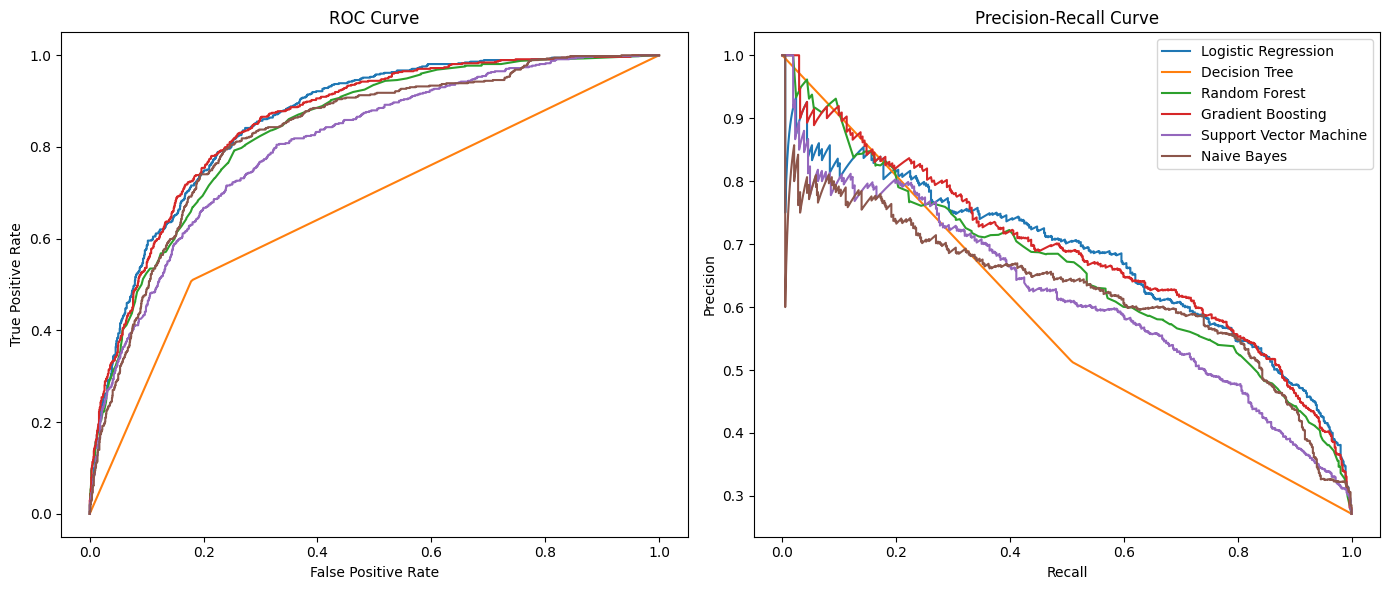

In [7]:
plt.figure(figsize=(14, 6))

for nome, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    # ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=nome)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    
    # PR
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=nome)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()


Os modelo cuja curva na "Precision-Recall Curve" domina a de outro (está acima e/ou à direita em quase todos os pontos) geralmente tem um desempenho superior. Logo, pode-se evidenciar que o modelo de Logistic Regression possui uma boa performace nesse quesito, assim como na "ROC Curve" que está mais próximo da parte superior esqueda que representa uma melhor é a capacidade do modelo de distinguir entre as classes positiva e negativa (TVP = 1 e TFP = 0).

### Interpretação
A - Logistic Regression superou os demais modelos em quase todas as métricas:

    Melhor F1-Score, LogLoss, Kappa e AUC.

    Isso indica um excelente equilíbrio entre identificar corretamente os clientes que fazem churn sem gerar muitos falsos positivos.

    Além disso, é um modelo de fácil interpretação e ideal para negócios que valorizam transparência nas decisões.

B - Gradient Boosting pode ser uma boa alternativa:

    Apesar de ficar um pouco atrás da regressão logística, teve desempenho competitivo em todas as métricas.

    Ideal se a empresa quiser buscar um leve ganho de performance e não se importar tanto com interpretabilidade.

C- Naive Bayes é outra opção de escolha:

    Altíssimo recall (89%), ou seja, detecta quase todos os clientes propensos a churn.

    No entanto, sua precisão é baixa (44%), o que implica em muitos falsos positivos (clientes marcados como churn mas que não sairão).

    É útil quando o custo de perder um cliente é muito maior do que o de agir de forma preventiva.

D - Random Forest apresenta desempenho bom, mas não se destaca nas métricas principais.

E- Decision Tree apresenta desempenho mediano e tende a sofrer de overfitting.

F - SVM novamente falha em capturar a classe positiva, com recall e F1-Score zerados. Possivelmente não configurado para lidar com o desbalanceamento da base — seria necessário aplicar técnicas como class_weight='balanced' ou ajustes no threshold de decisão.

### Conclusão Final
Melhor modelo geral para predição de churn:
Logistic Regression — excelente equilíbrio entre desempenho preditivo e interpretabilidade, ideal para tomada de decisão em negócios.

Melhor modelo para identificar o maior número de clientes que farão churn (alto recall):
Naive Bayes, se a empresa preferir errar por excesso de prevenção.

Melhorias recomendadas:

Testar técnicas de balanceamento de classes (SMOTE, ADASYN, class_weight) para modelos como SVM e Random Forest.

Realizar tuning de hiperparâmetros com GridSearchCV ou Optuna para refinar os modelos mais promissores.